<a href="https://colab.research.google.com/github/aryadeo/NEURAL_NETWORK_BASICS/blob/master/Pereptron/Perceptron_detailed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perceptron



![Perceptron](https://drive.google.com/uc?id=1MpXnhm2FJkPnjB99HrDIU_IGX1JTGdJ-)

The model equation is:

$y=1,\mbox{if} \sum_i w_ix_i>=b$

$y=0,\mbox{otherwise}$

Objective: Formation of a perectron model for classifying the bresat_cancer dataset in sklearn.datasets

#Library_Initialization

In [0]:
import numpy as np
import pandas as pd

import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



#Basic_Model_Class

In [0]:
breast_cancer=sklearn.datasets.load_breast_cancer()

In [0]:
X=breast_cancer.data
Y=breast_cancer.target

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

No binarization of data is required. Input is simply real numbers and output is in bollean format

The perceptron class has four functions.
1. initialization of model parameters
2. model equation
3. predicting the output for a give input
4. fitting the model into a given set of input and output by providing the learning algorithm

In [0]:
class Perceptron:

  def __init__(self):
    self.b=None
    self.w=None

  def model(self,X):
    return 1 if (np.dot(self.w,X)>=self.b) else 0

  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y):
    self.b=0
    self.w=np.ones(X.shape[1])

    for x,y in zip(X,Y):
      y_pred=self.model(x)

      if y==1 and y_pred==0:
        self.b=self.b+1
        self.w =self.w+x
      elif y==0 and y_pred==1:
        self.b=self.b-1
        self.w=self.w-x

In [0]:
perceptron_test=Perceptron()

In [0]:
perceptron_test.fit(X_train,Y_train)

In [108]:
Y_train_pred=perceptron_test.predict(X_train)
accuracy=accuracy_score(Y_train_pred,Y_train)
print(accuracy)

0.373046875


In [109]:
Y_test_pred=perceptron_test.predict(X_test)
accuracy=accuracy_score(Y_test_pred,Y_test)
print(accuracy)

0.3684210526315789


Here we are seeing that the perceptron model has a low accuracy of approximately 37% on the test data.

It could be better by running it for more epochs.

#Epochs

In [0]:
class Perceptron:

  def __init__(self):
    self.b=None
    self.w=None


  def model(self,X):
    return 1 if (np.dot(self.w,X)>=self.b) else 0


  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)



  def fit(self,X,Y,epochs=1):       #default #epochs=1
    self.b=0
    self.w=np.ones(X.shape[1])

    accuracy=[]
    max_acc=0

    for i in range(epochs):

      for x,y in zip(X,Y):
        y_pred=self.model(x)

        if y==1 and y_pred==0:
          self.b=self.b+1
          self.w =self.w+x
        elif y==0 and y_pred==1:
          self.b=self.b-1
          self.w=self.w-x
      accuracy.append(accuracy_score(self.predict(X),Y))
      if (accuracy[i]>max_acc):
        max_acc=accuracy[i]
    
    plt.plot(np.array(accuracy))
    plt.ylim([0,1])
    plt.show()
    print('maximum accuracy is:',max_acc)

In [0]:
perceptron_test=Perceptron()

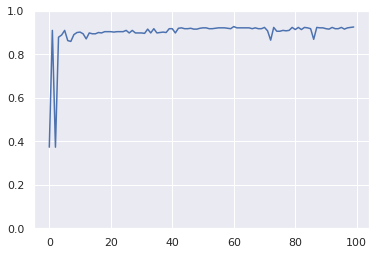

maximum accuracy is: 0.927734375


In [125]:
perceptron_test.fit(X_train,Y_train,100)

In [126]:
Y_train_pred=perceptron_test.predict(X_train)
accuracy=accuracy_score(Y_train_pred,Y_train)
print(accuracy)

0.92578125


Here we hve observed that by running the model for 100 epochs the accuarcy inserased to approx. 92.5%.

#Check_Points

With running the model for more epochs, the model parameter w and b are getting updated. But the best w and b are not getting stored. So to store them we use checkpoints.

In [0]:
class Perceptron:

  def __init__(self):
    self.b=None
    self.w=None


  def model(self,X):
    return 1 if (np.dot(self.w,X)>=self.b) else 0


  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)



  def fit(self,X,Y,epochs=1):       #default #epochs=1
    self.b=0
    self.w=np.ones(X.shape[1])

    accuracy=[]
    max_acc=0

    for i in range(epochs):

      for x,y in zip(X,Y):
        y_pred=self.model(x)

        if y==1 and y_pred==0:
          self.b=self.b+1
          self.w =self.w+x
        elif y==0 and y_pred==1:
          self.b=self.b-1
          self.w=self.w-x
      accuracy.append(accuracy_score(self.predict(X),Y))
      if (accuracy[i]>max_acc):
        max_acc=accuracy[i]
        ckpw=self.w
        ckpb=self.b
    
    self.w=ckpw
    self.b=ckpb##storing the w and b vaulue corresponding to maximum accuracy
    plt.plot(np.array(accuracy))
    plt.ylim([0,1])
    plt.show()
    print('maximum accuracy is:',max_acc)

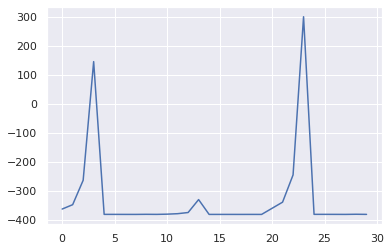

In [35]:
plt.plot(perceptron_test.w)
plt.show()